In [52]:
import torch
import numpy as np
import random

In [53]:
def synthetic_data(w, b, num_examples): 
    """⽣成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [54]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

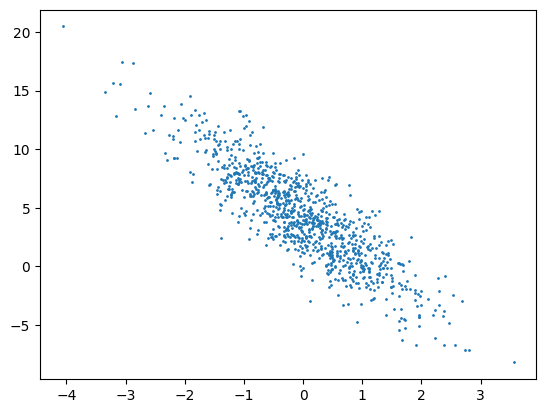

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(features[:,1], labels, 1)
plt.show()

In [56]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [58]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.9313,  1.9535],
        [-0.5142, -0.9501],
        [-1.5501,  0.6769],
        [ 0.2820, -0.1553],
        [ 0.2672, -0.5047],
        [-1.0352,  0.2411],
        [-0.0441,  1.3994],
        [ 0.2012,  0.1055],
        [-0.8502, -0.6415],
        [ 0.8128, -0.4073]]) 
 tensor([[-4.3171],
        [ 6.4071],
        [-1.2073],
        [ 5.2849],
        [ 6.4730],
        [ 1.3112],
        [-0.6493],
        [ 4.2333],
        [ 4.6847],
        [ 7.2074]])


In [74]:
# w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
w = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
def linreg(X, w, b):
    return X @ w + b

In [70]:
def squared_loss(y_hat, y):
    return ((y_hat - y)**2 / 2).sum()

In [64]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [75]:
def train():
    lr = 0.03
    num_epochs = 3
    net = linreg
    loss = squared_loss
    for epoch in range(num_epochs):
        for X,y in data_iter(batch_size, features, labels):
            y_hat = net(X, w, b)
            l = loss(y_hat, y)
            l.backward()
            sgd([w, b], lr, batch_size)
        with torch.no_grad():
            train_1 = loss(net(features, w, b), labels)
            print(f"epoch {epoch+1}, loss {float(train_1.mean()):f}")

In [76]:
train()

epoch 1, loss 32.469116
epoch 2, loss 0.112955
epoch 3, loss 0.050547


In [73]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([0.0004, 0.0004], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0003], grad_fn=<RsubBackward1>)
